In [1]:
#common imports:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import os

import matplotlib.dates as md

#import for visualization
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#for Worldmap
#import shapefile as shp


#for timeseries:
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter


#from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(10,8)})


#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

    

In [2]:
#Loading cleaned dataframe from Data_Cleaning Notebook:
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')
#df6 = pd.read_csv('df6.csv')

In [3]:
#Number of countries included in dataset:
df6 = df5.copy()
df6 = df6.set_index(['date'])
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

144 countries are included in the Covid-19 vaccination progress dataset.


In [4]:
#Create list with countries per region, create new column in df6 and map region to country:
Africa = ('Algeria','Angola','Chad', "Cote d'Ivoire",'Egypt','Equatorial Guinea','Ghana','Guinea','Kenya','Malawi','Maldives','Mali','Mauritius','Morocco','Mozambique','Namibia','Niger','Nigeria','Rwanda','Sao Tome and Principe', 'Senegal','Seychelles','Sierra Leone','Somalia','South Africa','South Sudan','Sudan','Swaziland','Tanzania','Togo','Tunisia','Uganda','Western Sahara', 'Zambia','Zimbabwe')

Asia = ('Afghanistan','Azerbaijan','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','Hong Kong','India','Indonesia','Japan','Kazakhstan','Kyrgyzstan','Laos','Macao','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Pakistan','Philippines','Russia','Singapore','South Korea','Sri Lanka','Taiwan','Tajikistan','Thailand','Turkmenistan','Uzbekistan','Vietnam')
    
Middle_East = ('Bahrain','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman','Qatar','Saudi Arabia','Syria','Turkey','United Arab Emirates','Yemen')
   
Europe = ('Albania','Andorra','Armenia','Austria','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Faeroe Islands','Finland','France','Georgia','Germany','Greece','Greenland','Hungary','Iceland','Ireland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Macedonia','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Northern Cyprus','Norway','Poland','Portugal','Romania','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Ukraine','Vatican City')

UK_BritishOversea= ('United Kingdom','Anguilla','Antigua and Barbuda','Bermuda','Cayman Islands','Falkland Islands','Gibraltar','Guernsey','Isle of Man','Jersey', 'Montserrat', 'Saint Helena', 'Turks and Caicos Islands')

North_America = ('Canada','United States')
Central_America_Caribic = ('Antigua and Barbuda','Bahamas','Barbados','Belize','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Grenada','Guatemala','Haiti','Honduras','Jamaica','Mexico','Nicaragua','Panama','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Trinidad and Tobago')
South_America = ('Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela')
Australia_Oceania = ('Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu')


continents = {country: 'Asia' for country in Asia}
continents.update({country: 'Europe' for country in Europe})
continents.update({country: 'Africa' for country in Africa})
continents.update({country: 'Middle_East' for country in Middle_East})
continents.update({country: 'UK_BritishOversea' for country in UK_BritishOversea})
continents.update({country: 'North_America' for country in North_America})
continents.update({country: 'Central_America_Caribic' for country in Central_America_Caribic})
continents.update({country: 'South_America' for country in South_America})
continents.update({country: 'Australia_Oceania' for country in Australia_Oceania})

df6['cgrouped'] = df6['country'].map(continents)



## Exploratory Data Analysis

Answering the following Questions:
- Which country is the fastest with vaccinating its people?
- Which country vaccinated the most (absolute)?
- Which vaccines are used more often (information not available by quantity only as combination with all used vaccines per country?# noch offen
- How looks the vaccination progress by region?

## Groupby Countries & Regions

### Which country is the fastest with fully vaccinating its people?

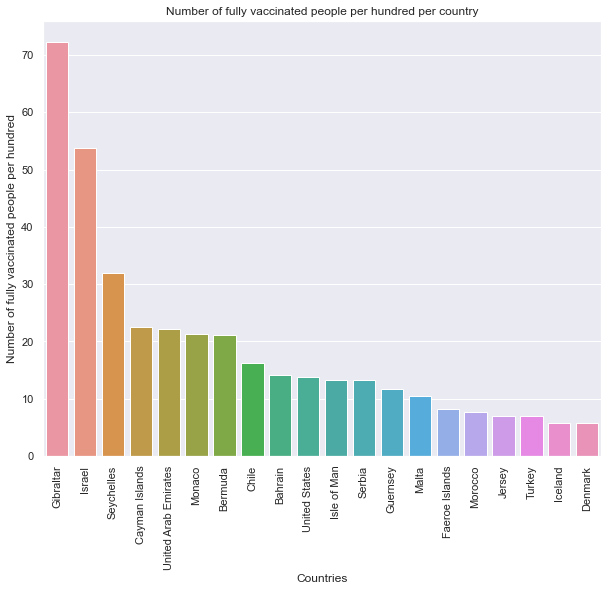

In [5]:
col_vacc = ['country', 'vaccines','people_fully_vaccinated_per_hundred']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_fully_vaccinated_per_hundred', ascending=False).dropna(subset=['people_fully_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:20]

vacc_am_bycountry = vacc_am_bycountry.sort_values('people_fully_vaccinated_per_hundred', ascending=False)

#plt.figure(figsize=(8, 8))
vacc_p_c = sns.barplot(vacc_am_bycountry.index, vacc_am_bycountry.people_fully_vaccinated_per_hundred)

plt.title('Number of fully vaccinated people per hundred per country')
plt.ylabel('Number of fully vaccinated people per hundred')
plt.xlabel('Countries')
plt.xticks(rotation=90)
#fig.savefig('images/vacc_people_hundred_country.jpg')
plt.show();

#(farbe und Grid)

Until 24.03.2021 Gibraltar is clearly leading in vaccinating its citizens. Followed by Israel and Seychelles. 

(noch eingehen auf Größe des Landes und gdp..)

### Which country vaccinated the most (absolute)?

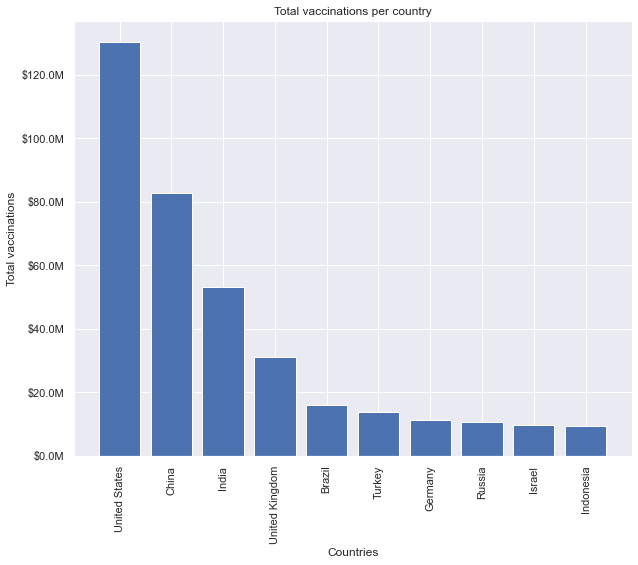

In [6]:
col_vacc = ['country', 'total_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()

plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.total_vaccinations, color = 'b')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

plt.title('Total vaccinations per country')

ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Countries')
plt.show();

This chart shows the effort bigger countries have to do in vaccinating their citizens. United States already vaccinated over 130 million dosis and have only 25% of their cititzens vaccinated but Israel with only 9 million citizens has already vaccinated 60% of its population.

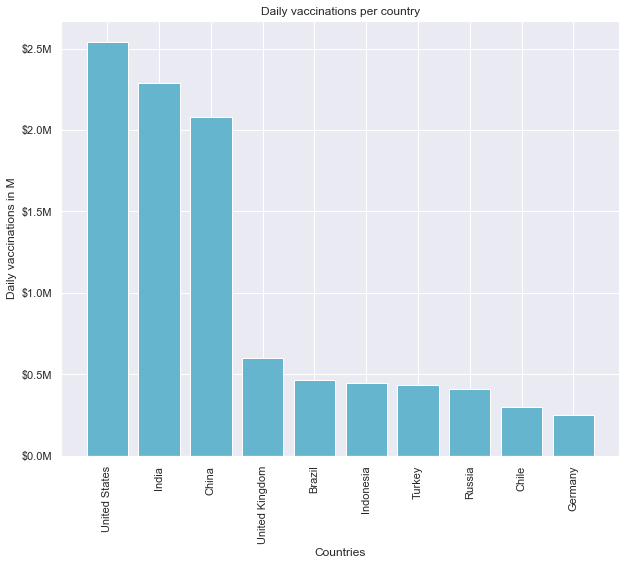

In [7]:
#Groupby daily vaccinations

col_vacc = ['country', 'daily_vaccinations', 'vaccines']
vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('daily_vaccinations', ascending=False).dropna(subset=['daily_vaccinations'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

fig, ax = plt.subplots()
#plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.daily_vaccinations, color = 'c')

def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)



ax.yaxis.set_major_formatter(formatter)

plt.title('Daily vaccinations per country')
plt.xticks(rotation = 90)
plt.ylabel('Daily vaccinations in M')
plt.xlabel('Countries')
plt.show();

United Stated vaccinates over 2.5 M people daily, Germany is only around 250.000 but still in the Top 10.

### How looks the vaccination progress by region?

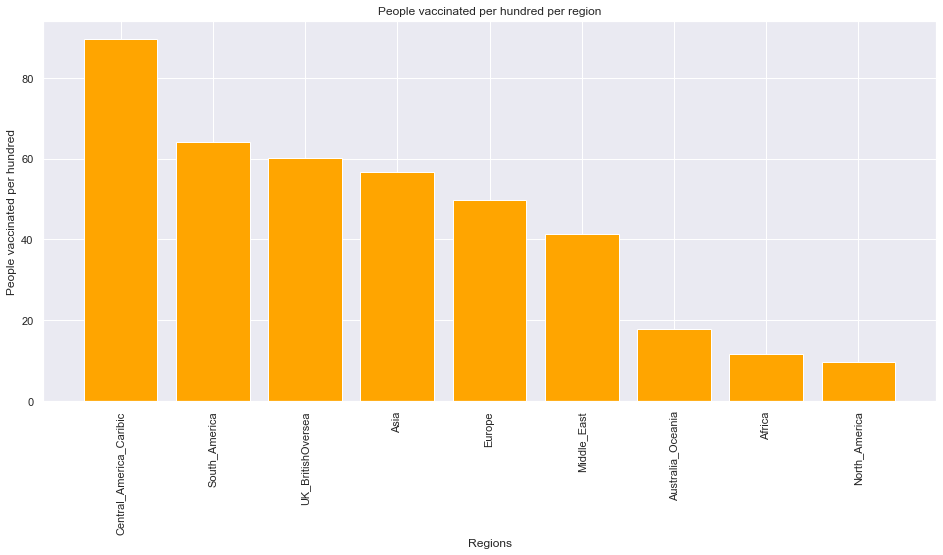

In [8]:
#Groupby regions:
col_vacc = ['cgrouped', 'people_vaccinated_per_hundred']
vacc_am_bycountry = df6[col_vacc].groupby('cgrouped').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
vacc_am_bycountry = vacc_am_bycountry.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_am_bycountry.index, vacc_am_bycountry.people_vaccinated_per_hundred, color = 'orange')

plt.title('People vaccinated per hundred per region')
plt.xticks(rotation = 90)
plt.ylabel('People vaccinated per hundred')
plt.xlabel('Regions')
plt.show();

Who is so fast in Central America/Caribic and South America --> check

Central America -->Chile


In [9]:

#df6 = df6.set_index(['date'])

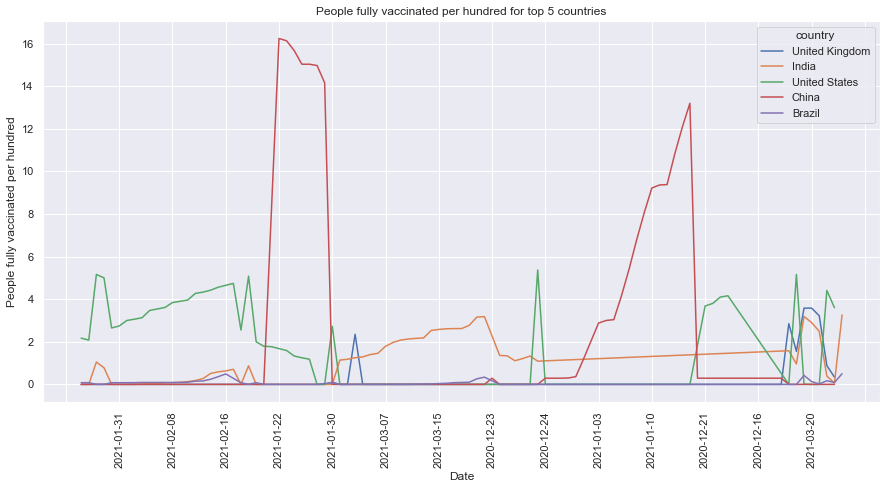

In [30]:
#Region plot as lineplot:

#Selecting required columns:
cols = ['country', 'date', 'people_fully_vaccinated_per_hundred']
df6_line = df6.reset_index()
#List of top 5 countries from above:
top10_countries = ['United States', 'India', 'China', 'United Kingdom', 'Brazil']#'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany'

# Filtering and sorting the data

df6_line1 = df6_line[['country', 'date', 'people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=True)

df6_line1_top10 = df6_line1[df6_line1.country.isin(top10_countries)].dropna()

df6_line['date'] = pd.to_datetime(df6_line['date'])#, format = '%Y-%m-%d'

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax = ax, data=df6_line1_top10, x="date", y="people_fully_vaccinated_per_hundred",hue='country').set_title('People fully vaccinated per hundred for top 5 countries')


# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))

# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
#ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
#ax.tick_params(axis = 'x', which = 'major', length = 10)
#ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')

#plt.xticks(rotation = 90)

# show the plot
plt.show();

For China we see an impressive vaccination start in January but nearly stopping end of January. India started end of January and increases slowly but steadily. 
United States has an break short before change of president and then an clear increase until end of february. Klären, was dann los war?
Was passiert für UK? Seasonality?Warum so ein up and down?

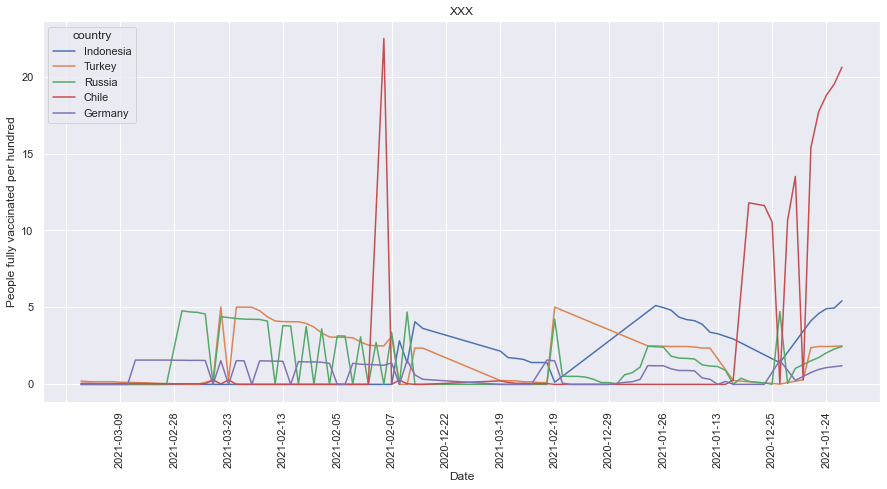

In [29]:
#Region plot as lineplot:

#Selecting required columns:
cols = ['country', 'date', 'people_fully_vaccinated_per_hundred']
df6_line = df6.reset_index()
#List of top 6-10 countries from above:
top10_countries = ['Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']

# Filtering and sorting the data

df6_line1 = df6_line[['country', 'date', 'people_fully_vaccinated_per_hundred']].sort_values(by='people_fully_vaccinated_per_hundred', ascending=True)

df6_line1_top10 = df6_line1[df6_line1.country.isin(top10_countries)].dropna()

df6_line['date'] = pd.to_datetime(df6_line['date'])#, format = '%Y-%m-%d'

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(ax = ax, data=df6_line1_top10, x="date", y="people_fully_vaccinated_per_hundred",hue='country').set_title('XXX')


# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday = 1))

# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# specify the position of the minor ticks at each day
#ax.xaxis.set_minor_locator(md.DayLocator(interval = 1))

# set ticks length
#ax.tick_params(axis = 'x', which = 'major', length = 10)
#ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')

#plt.xticks(rotation = 90)

# show the plot
plt.show();

Ist das so richtig? Beide Plots mit anderen Auswertungen abgleichen!

In [ ]:
#lst_vaccine = [df7['Covaxin'], df7['EpiVacCorona'], df7['Johnson&Johnson'], df7['Moderna'], df7['Oxford/AstraZeneca'], df7['Pfizer/BioNTech'], df7['Sinopharm/Beijing'], df7['Sinopharm/Wuhan'], df7['Sinovac'], df7['Sputnik V']]

In [ ]:
#data = df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
#fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
#fig.show();

In [ ]:
lst_vaccines = df3['vaccines']
vaccince_types = df3.groupby(lst_vaccines)['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

In [ ]:
df_countries = df2.groupby(['country', 'vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()
df_countries.head()

In [ ]:
 EU_countries = ['Austria', 'Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

In [ ]:
#Vaccination rates in Europe vs. UK:
#f_countries1 = df2.filter('EU_countries')
#print(df_countries1)
#data = df_countries1[['country', 'people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
#plt.xticks(rotation=90);

In [ ]:
#Top 20 Vaccination rates worldwide only data from 24.03.2021 used:
#data = df_daily.loc['2021-03-24'][['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#plt.title(f"Top 20 countries leading with vaccination progress at 24.03.2021") 
#plt.xticks(rotation=90);

In [ ]:
#Last 20 Vaccination rates worldwide:
#data = df_countries[['country','people_fully_vaccinated_per_hundred']].nsmallest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Last 20 countries with vaccination progress until {d}") 
#plt.xticks(rotation=90);

## Time series

Analyzing Time series: 
The vaccination progress is reported daily, so that we have timeseries to analyze. First I set a DatetimeIndex as index to our DataFrame.

In [ ]:
#import matplotlib.dates as mdates

In [ ]:
#%reload_ext autoplot

In [ ]:
#%autoplot

In [ ]:
##%autoplot -v dtale

In [ ]:
#set DatetimeIndex as index for our DataFrame:
df_daily = df6.copy()
#df_daily = df_daily.set_index('date')
df_daily.head(3)

In [ ]:
df_daily.index

In [ ]:
#fig, ax = plt.subplots()
#ax.xaxis.set_major_formatter(mdates.DateFormatter(r"%b\n%Y"))

In [ ]:
# Add columns with year, month, and weekday name
df_daily['Year'] = df_daily.index.year
df_daily['Month'] = df_daily.index.month
df_daily['Day'] = df_daily.index.day

#df_daily['Weekday_Name'] = df_daily.index.day_of_week
#TODO: change day of week to name of day
# Display a random sampling of 5 rows
df_daily.sample(5, random_state=0)

In [ ]:
#Select data for a single day:
df_daily.loc['2021-03-24']

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily_vaccinations', data=df_daily, ax=ax)#, hue=('country' == 'Germany'
ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

In [ ]:
# checking daily vaccinations for Top 10 countries:
#Selecting required columns:
cols = ['country', 'date', 'daily_vaccinations']
df_daily1 = df_daily.reset_index()
#List of top 10 countries from above:
top10_countries = ['United States', 'India', 'United Kingdom', 'Brazil', 'Indonesia', 'Turkey', 'Russia', 'Chile', 'Germany']#'China', 

# Filtering and sorting the data

daily_vacc = df_daily1[['country', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)

daily_vacc_top10 = daily_vacc[daily_vacc.country.isin(top10_countries)].dropna()

#display(daily_vacc_top10) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))

sns.relplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country', col='country', kind='line', col_wrap=2)
#sns.lineplot(data=daily_vacc_top10, x='date', y='daily_vaccinations', hue='country')
plt.xticks(rotation=90);
#plt.xticks('');

auf Zeit ab Februar - März eingrenzen?
China verzerrt - was tun?
warum hat Russland am 01.03 so einen Sprung nach unten? Sind schon so viele geimpft, wie sehen die Infektionszahlen aus?

In [ ]:
#
df_daily.loc['2021-01-01':'2021-01-31']

In [ ]:
df_daily_march = df_daily.loc['2021-03']

In [ ]:
#Daily vaccinations for March:
fig, ax = plt.subplots()
sns.lineplot(x='date', y='daily_vaccinations', data=df_daily_march, ax=ax)#, hue=('country' == 'Germany'
ax.set(title='Daily Vaccinations worldwide', ylabel=r'$^\circ$C');

In [ ]:
#People vaccinated from december up to now:
df_daily['people_vaccinated'].plot(linewidth=0.5);

In [ ]:
#Daily vaccinations worldwide:
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinations Europe:
df_daily_EU_GB = df_daily[df_daily['cgrouped'] == 'Europe']
cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
axes = df_daily_EU_GB[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinations EU and GB:
#df_daily_EU_GB = df_daily.loc[]
#cols_plot = ['daily_vaccinations', 'daily_vaccinations_per_million']#'total_vaccinations'
#axes = df_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

In [ ]:
#Daily vaccinated from december up to now:
df_daily['daily_vaccinations'].plot(linewidth=0.5);

In [ ]:
#Daily vaccinated from december up to now for Europe:
df_daily_EU_GB['daily_vaccinations'].plot(linewidth=0.5, title='Number of daily vaccinations in Europe', xlabel = "Date", ylabel = 'Number of vaccinations');

In [ ]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']

In [ ]:
df_daily_EU = df_daily[df_daily['cgrouped'] == 'Europe']
UK = df_daily[df_daily['cgrouped'] == 'UK & British Oversea']
USA = df_daily[df_daily['cgrouped'] == 'USA']
Asia = df_daily[df_daily['cgrouped'] == 'Asia']


In [ ]:
df6.sample(20)

In [ ]:
plt.style.use('seaborn-whitegrid')
cols_plot = ['daily_vaccinations']#'total_vaccinations', , 'daily_vaccinations_per_million'
axes1 = df_daily_EU[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes2 = UK[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes3 = USA[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
axes4 = Asia[cols_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize = (8,8), subplots=True);
#for ax in axes:
    #ax.set_ylabel('Daily Vaccinations')

### Worldmap

In [ ]:
#Initialize visualization set:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [ ]:
import geopandas as gpd
#from shapely.geometry import Point
import geopy
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [ ]:
#import geo data
import geopandas as gpd
## map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
#join new map data to existing CV19 vaccine dataframe
mapped = world.set_index('iso_a3').join(df2.set_index('iso_code')).reset_index()

In [ ]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')

In [ ]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

In [ ]:
#daily vaccinations
graph_world('daily_vaccinations')

In [ ]:
#total vaccinations per hundr
graph_world('total_vaccinations_per_hundred')

In [ ]:
#df_coordinates = pd.read_csv('coordinates.csv')
df_coordinates_wo_Province = pd.read_csv('coordinates_wo_Province.csv')

In [ ]:
df_coordinates_wo_Province.shape

In [ ]:
df2_for_merge = df2[['country', 'iso_code']].copy()

In [ ]:
#add latitude/longitude data to dataframe for worldmap plotting:


df2_with_coordinates_wo_Province = pd.merge(df2_for_merge, df_coordinates_wo_Province, on='iso_code', how='right')#, left_on='iso_code', right_on='country'

In [ ]:

#df2_with_coordinates_concat = pd.concat([df2_for_merge, df_coordinates_wo_Province], keys='iso_code')

In [ ]:
df2_with_coordinates_wo_Province.sample(10)

In [ ]:
df2_with_coordinates_wo_Province[df2_with_coordinates_wo_Province.iso_code == 'DEU']

In [ ]:
df = pd.DataFrame({'one': {'A': 10, 'B': 20, 'C': 30, 'D': 40, 'E': 50}})
map_dict = {'A': 'every', 'B': 'good', 'C': 'boy', 'D': 'does', 'E': 'fine'}

df['two'] = df.index.to_series().map(map_dict)

AAAARGHHHHH!!!! warum concatenate nur USA und merge alles nur nicht USA????

In [ ]:
df2_with_coordinates.sample(10)

In [ ]:
df2_with_coordinates[df2_with_coordinates.country == 'China'].head

In [ ]:
df2_with_coordinates.shape

In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []

In [ ]:
# function to find the coordinate
# of a given country 


#geolocator = Nominatim()

#tmp = df.head().copy()

#latlon = tmp.Address.apply(lambda addr: geolocator.geocode(addr))

#tmp["Latitude"] = [x.latitude for x in latlon]
#tmp["Longitude"] = [x.longitude for x in latlon]


def findGeocode(country):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geopy.geocoders.options.default_user_agent = "my-application"
        geolocator = Nominatim()#user_agent="your_app_name",user_agent="my-application"
      
          
        return geolocator.geocode(country)
      
    except GeocoderTimedOut:
          
        return findGeocode(country)    
  
# each value from country column
# will be fetched and sent to
# function find_geocode   
for i in (df2['country']):
      
    if findGeocode(i) != None:
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a country not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
geolocate(country='USA')

In [ ]:
def geolocate(country=None):
    '''
    Inputs country. Returns the lat/long coordinates of the center of the country.
    '''
    
    # If country exists,
    for i in (df2['country']):
        if country != None:
            # Try
            try:
                # To geolocate country
                loc = geolocator.geocode(country)
                latitude.append(loc.latitude)
                longitude.append(loc.longitude)
                # And return latitude and longitude
               # return (loc.latitude, loc.longitude)
            # Otherwise
            except:
                # Return missing value
                return np.nan
        # If country doesn't exist
        else:
            # Try
            try:
                # Geolocate the center of the country
                loc = geolocator.geocode(country)
                # And return latitude and longitude 
                return (loc.latitude, loc.longitude)
            # Otherwise
            except:
                # Return missing value
                return np.nan
 


In [ ]:
geolocate(country='China')

In [ ]:
# now add this column to dataframe
df2["Longitude"] = longitude
df2["Latitude"] = latitude
  
df2.head()

In [ ]:
#creation of a shapefile out of df2
#col_vacc = ['country', 'people_vaccinated_per_hundred', 'vaccines']
#vacc_am_bycountry = df2[col_vacc].groupby('country').max().sort_values('people_vaccinated_per_hundred', ascending=False).dropna(subset=['people_vaccinated_per_hundred'])
#vacc_am_bycountry['geometry'] = df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)

In [ ]:
shapefile = 'map/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
#gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gpd.columns = ['country', 'country_code', 'geometry']
gpd.head()

# Conclusion